In [1]:
# importando bibliotecas
import logging
import os
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

# configurando o logging
logging.basicConfig(
    filename='./results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

In [2]:
# lendo csv
def read_data(file_path):
    """Read data from csv.
    Args:
        file_path (str): file path to read.
    Return:
        df_file (DataFrame): returns the file read as a dataframe.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError: # pylint: disable=bare-except
        logging.error("Error read_csv. We were not able to find %s", file_path)

In [3]:
pasta_dados = 'data/preco_gasolina_regioes/'

lista_arquivos = os.listdir(pasta_dados)
lista_arquivos

['preco_gasolina_regioes_2004-01.csv',
 'preco_gasolina_regioes_2004-02.csv',
 'preco_gasolina_regioes_2005-01.csv',
 'preco_gasolina_regioes_2005-02.csv',
 'preco_gasolina_regioes_2006-01.csv',
 'preco_gasolina_regioes_2006-02.csv',
 'preco_gasolina_regioes_2007-01.csv',
 'preco_gasolina_regioes_2007-02.csv',
 'preco_gasolina_regioes_2008-01.csv',
 'preco_gasolina_regioes_2008-02.csv',
 'preco_gasolina_regioes_2009-01.csv',
 'preco_gasolina_regioes_2009-02.csv',
 'preco_gasolina_regioes_2010-01.csv',
 'preco_gasolina_regioes_2010-02.csv',
 'preco_gasolina_regioes_2011-01.csv',
 'preco_gasolina_regioes_2011-02.csv',
 'preco_gasolina_regioes_2012-01.csv',
 'preco_gasolina_regioes_2012-02.csv',
 'preco_gasolina_regioes_2013-01.csv',
 'preco_gasolina_regioes_2013-02.csv',
 'preco_gasolina_regioes_2014-01.csv',
 'preco_gasolina_regioes_2014-02.csv',
 'preco_gasolina_regioes_2015-01.csv',
 'preco_gasolina_regioes_2015-02.csv',
 'preco_gasolina_regioes_2016-01.csv',
 'preco_gasolina_regioes_

In [4]:
gasolina_precos = pd.DataFrame({'Tempo': [], 'Preco_Media': []})

In [5]:
for arquivo in lista_arquivos:
    df = read_data(pasta_dados + arquivo)
    media_total = df.loc[(len(df.index))-1, 'Preco_Media']
    ano = arquivo[23:27]
    
    if '-01' in arquivo: # primeiro semestre
        data = '01-06-' + ano
    else: # segundo semestre
        data = '01-12-' + ano
        
    gasolina_precos = gasolina_precos.append({'Tempo': data, 'Preco_Media': media_total}, ignore_index = True)

In [6]:
gasolina_precos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tempo        36 non-null     object 
 1   Preco_Media  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [7]:
gasolina_precos['Tempo'] = pd.to_datetime(gasolina_precos['Tempo'], format='%d-%m-%Y')
gasolina_precos

,Tempo,Preco_Media
0,2004-06-01,2.03
1,2004-12-01,2.18
2,2005-06-01,2.30
3,2005-12-01,2.43
4,2006-06-01,2.59
5,2006-12-01,2.59
6,2007-06-01,2.56
7,2007-12-01,2.53
8,2008-06-01,2.54
9,2008-12-01,2.55


In [8]:
gasolina_precos.to_csv('data/gasolina_precos-2004-2021.csv', index=False)

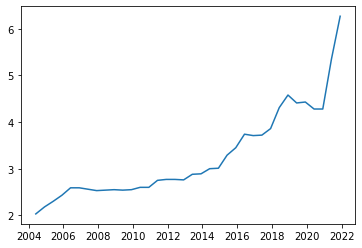

In [9]:
# analisando os graficos iniciais
plt.plot(gasolina_precos['Tempo'], gasolina_precos['Preco_Media'])
plt.show()

In [10]:
def media_anual(df_first, df_second):
    """Read data from csv.
    Args:
        df_first (DataFrame): first semester
        df_second (DataFrame): second semester
    Return:
        df_file (DataFrame): returns the dataframe.
    """
    df_file = pd.DataFrame()
    col1_name = df_first.columns[0]
    df_file[col1_name] = df_first[col1_name]
    df_file['Preco_01'] = df_first['Preco_Media']
    df_file['Preco_02'] = df_second['Preco_Media']
    df_file['Preco_Media'] = df_file[['Preco_01', 'Preco_02']].mean(axis=1)
    return df_file

In [11]:
regioes_2021_01 = read_data('data/preco_gasolina_regioes/preco_gasolina_regioes_2021-01.csv')
regioes_2021_02 = read_data('data/preco_gasolina_regioes/preco_gasolina_regioes_2021-02.csv')
regioes_2021 = media_anual(regioes_2021_01, regioes_2021_02)
print(df.dtypes)
regioes_2021

Regiao_Sigla     object
Preco_Media     float64
dtype: object


,Regiao_Sigla,Preco_01,Preco_02,Preco_Media
0,CO,5.48,6.46,5.970
1,N,5.41,6.34,5.875
2,NE,5.40,6.36,5.880
3,S,5.29,6.26,5.775
4,SE,5.32,6.21,5.765
5,Total,5.35,6.27,5.810


In [12]:
regioes_2021.to_csv('data/precos_regioes_2021.csv', index=False)

In [15]:
estados_2021_01 = read_data('data/preco_gasolina_estados/preco_gasolina_estados_2021-01.csv')
estados_2021_01 = read_data('data/preco_gasolina_estados/preco_gasolina_estados_2021-02.csv')
estados_2021 = media_anual(estados_2021_01, estados_2021_01)
estados_2021

,Estado_Sigla,Preco_01,Preco_02,Preco_Media
0,AC,6.76,6.76,6.76
1,AL,6.37,6.37,6.37
2,AM,6.30,6.30,6.30
3,AP,5.47,5.47,5.47
4,BA,6.40,6.40,6.40
5,CE,6.36,6.36,6.36
6,DF,6.58,6.58,6.58
7,ES,6.40,6.40,6.40
8,GO,6.64,6.64,6.64
9,MA,6.15,6.15,6.15


In [14]:
estados_2021.to_csv('data/precos_estados_2021.csv', index=False)